In [1]:
import cv2
import numpy as np
from scipy.spatial import distance as dist
import matplotlib.pyplot as plt
import numpy as np
import argparse
import glob
import cv2

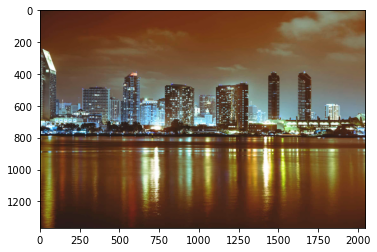

In [2]:
original = cv2.imread("img1.jpeg")

plt.imshow(original)
plt.show()

In [3]:

index = {}
images = {}

In [4]:
for imagePath in glob.glob(r"C:\Users\User\Documents\ML\comp vision\pic" + "/*.jpg"):
    
    filename = imagePath[imagePath.rfind("/") + 1:]

    image = cv2.imread(imagePath)

    images[filename] = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    

    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8],
                        [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    index[filename] = hist

In [6]:
OPENCV_METHODS = (
    ("Correlation", cv2.HISTCMP_CORREL),
    ("Chi-Squared", cv2.HISTCMP_CHISQR),
    ("Intersection", cv2.HISTCMP_INTERSECT),
    ("Hellinger", cv2.HISTCMP_BHATTACHARYYA))

for (methodName, method) in OPENCV_METHODS:
   
    results = {}
    reverse = False
   
    if methodName in ("Correlation", "Intersection"):
        reverse = True

In [8]:
for (methodName, method) in OPENCV_METHODS:
    results = {}
    reverse = False
    
    # if we are using the correlation or intersection
    # method, then sort the results in reverse order
    if methodName in ("Correlation", "Intersection"):
        reverse = True
    for (k, hist) in index.items():
        d = cv2.compareHist(index[r"C:\Users\User\Documents\ML\comp vision\pic\img1.jpg"], hist, method)
        results[k] = d
        
    # sort the results
    results = sorted([(v, k) for (k, v) in results.items()], reverse = reverse)

In [12]:
index.keys()
index[r"C:\Users\User\Documents\ML\comp vision\pic\img1.jpg"]

array([4.49657906e-03, 1.25079066e-03, 2.48069118e-05, 1.30562694e-06,
       1.30562694e-06, 2.61125388e-06, 0.00000000e+00, 0.00000000e+00,
       6.54119067e-04, 1.90490973e-03, 9.02188243e-04, 1.07061409e-04,
       5.22250775e-06, 1.30562694e-06, 2.61125388e-06, 0.00000000e+00,
       0.00000000e+00, 1.17506424e-05, 1.51452725e-04, 2.49374745e-04,
       7.96432432e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.83376163e-06,
       4.04744351e-05, 3.13350465e-05, 1.30562694e-06, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.04450155e-05, 2.61125388e-06, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.30562694e-06, 2.61125388e-06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.30562694e-06,
      

In [13]:

for (k, hist) in index.items():

    d = cv2.compareHist(index[r"C:\Users\User\Documents\ML\comp vision\pic\img2.jpg"], hist, method)
    results[k] = d
    # sort the results
    results = sorted([(v, k) for (k, v) in results.items()], reverse = reverse)

TypeError: list indices must be integers or slices, not str

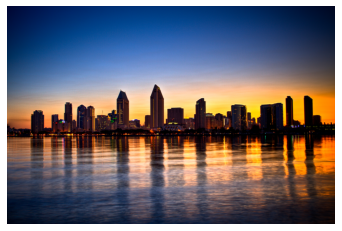

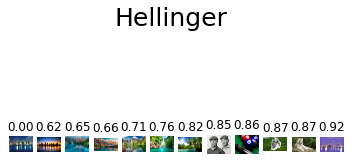

In [15]:

fig = plt.figure("Query")
ax = fig.add_subplot(1, 1, 1)
ax.imshow(images[r"C:\Users\User\Documents\ML\comp vision\pic\img2.jpg"])
plt.axis("off")


fig = plt.figure("Results: %s" % (methodName))
fig.suptitle(methodName, fontsize = 25)


for (i, (v, k)) in enumerate(results):
    ax = fig.add_subplot(1, len(images), i + 1)
    ax.set_title("%.2f" % (v))
    plt.imshow(images[k])
    plt.axis("off")

plt.show()

C:\Users\User\Anaconda3\envs\cv\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


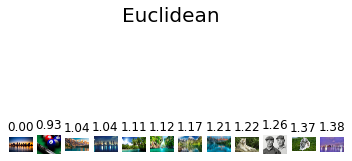

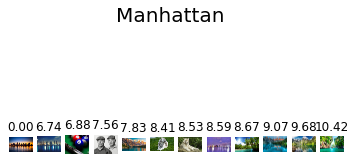

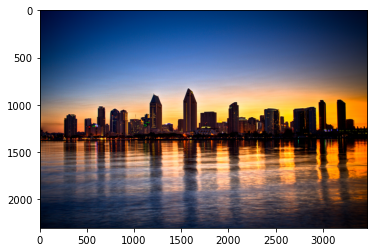

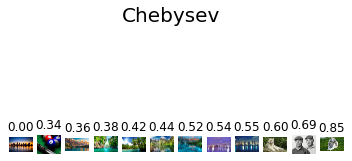

In [21]:
SCIPY_METHODS = (
    ("Euclidean", dist.euclidean),
    ("Manhattan", dist.cityblock),
    ("Chebysev", dist.chebyshev))

for (methodName, method) in SCIPY_METHODS:
    
    results = {}
    
    for (k, hist) in index.items():
        
        d = method(index[r"C:\Users\User\Documents\ML\comp vision\pic\img2.jpg"], hist)
        results[k] = d
       
    
    results = sorted([(v, k) for (k, v) in results.items()])
   
    fig = plt.figure("Query")
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(images[r"C:\Users\User\Documents\ML\comp vision\pic\img2.jpg"])
    plt.axis("on")
    
    fig = plt.figure("Results: %s" % (methodName))
    fig.suptitle(methodName, fontsize = 20)
   
    for (i, (v, k)) in enumerate(results):
        
        ax = fig.add_subplot(1, len(images), i + 1)
        ax.set_title("%.2f" % (v))
        plt.imshow(images[k])
        plt.axis("off")

plt.show()